In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pykalman import KalmanFilter
from scipy.signal import argrelextrema

# Loading Data

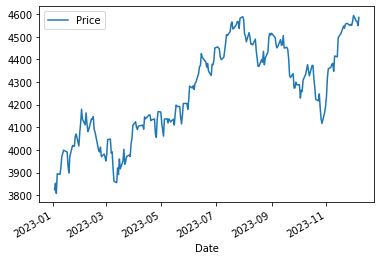

In [2]:
data=pd.read_csv("S&P500.csv",index_col=0)
data.index=pd.to_datetime(data.index, format='%m/%d/%Y')
data.sort_index(inplace=True)
data=data.loc['2023':]
data.plot()

In [3]:
data

,Price
Date,
2023-01-03,3824.14
2023-01-04,3852.97
2023-01-05,3808.10
2023-01-06,3895.08
2023-01-09,3892.09
...,...
2023-12-01,4594.63
2023-12-04,4569.78
2023-12-05,4567.18


# Method 1

## Using the "Local Maximum" and "Local Minimum" to Detect the Change Point

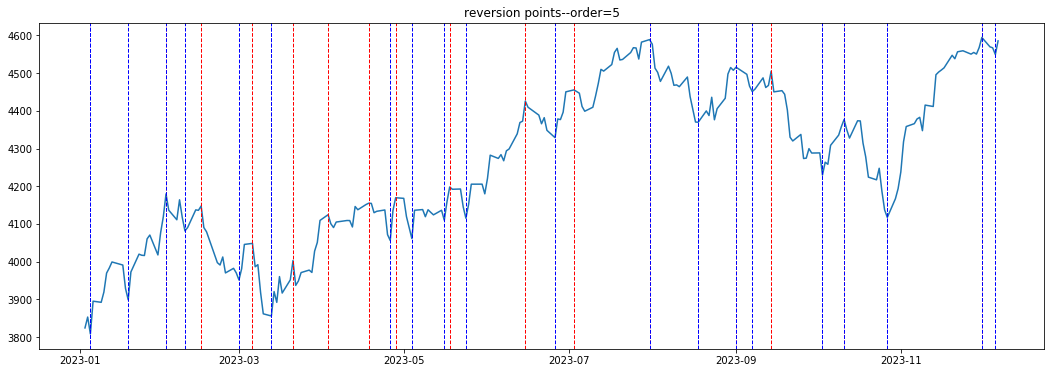

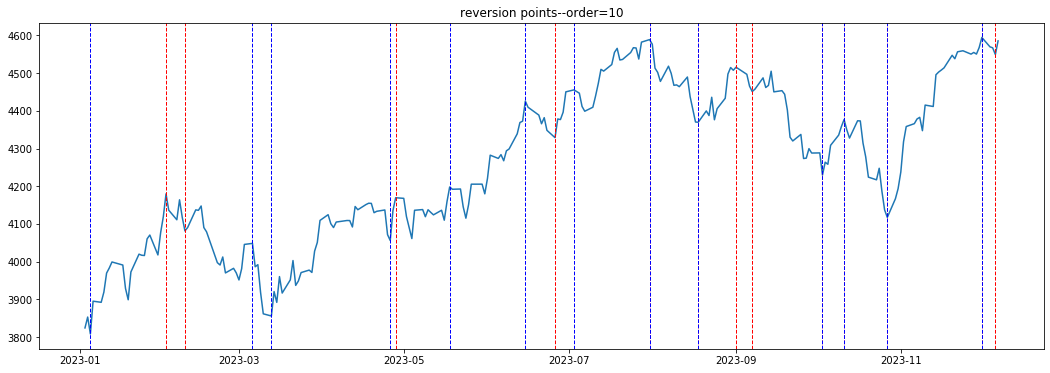

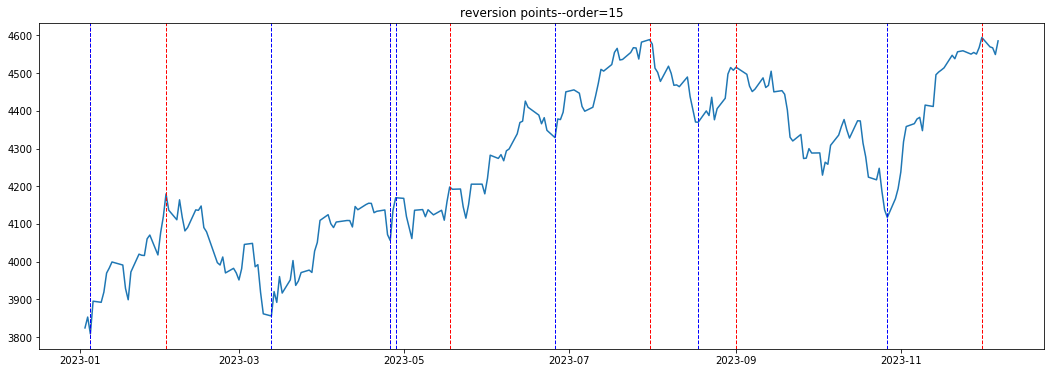

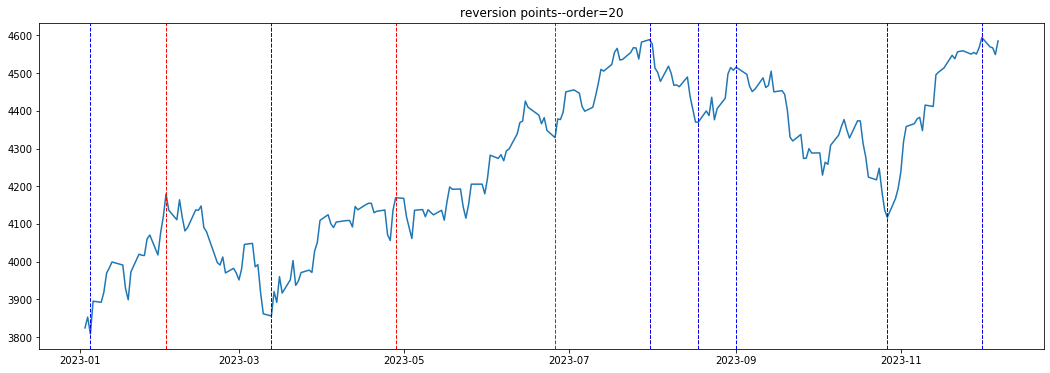

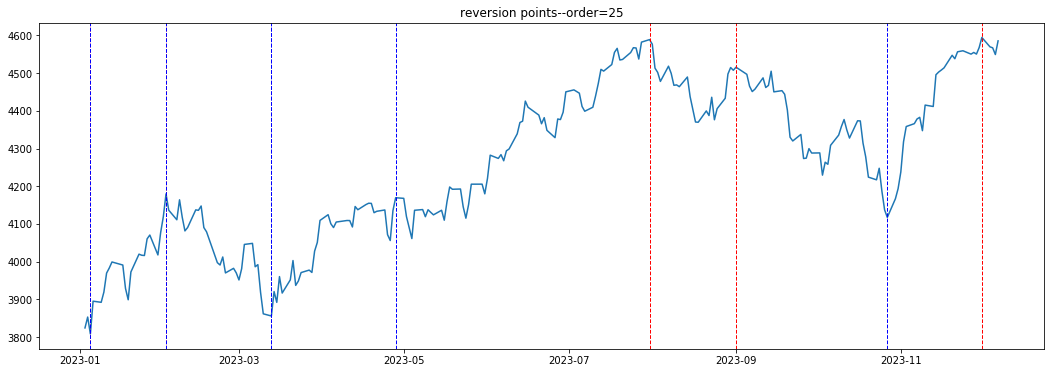

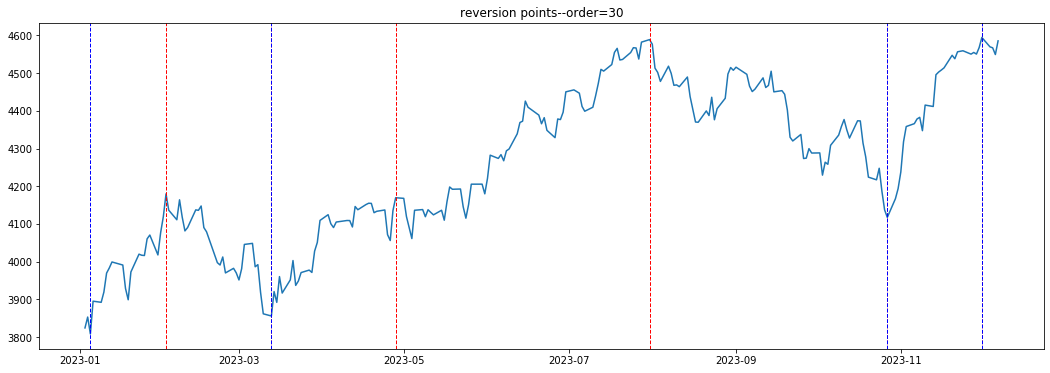

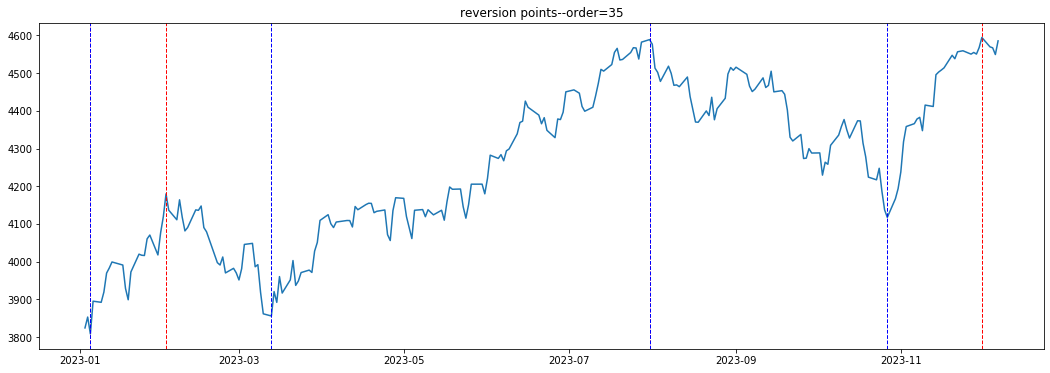

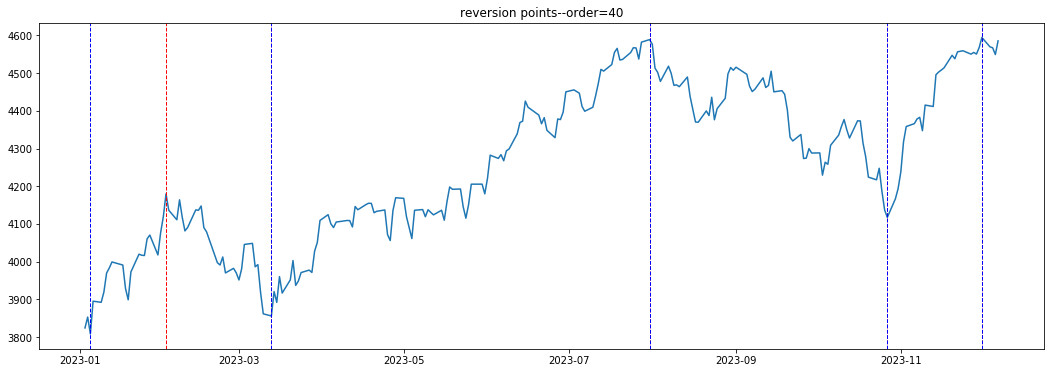

In [39]:
for order in [5,10,15,20,25,30,35,40]:
    peak_indexes =argrelextrema(data.values, np.greater,order=order)
    peak_indexes =data.index[peak_indexes[0]]
    valley_indexes = argrelextrema(data.values, np.less,order=order)
    valley_indexes = data.index[valley_indexes[0]]

    real_reversions=[]
    for i in data.index:

        if i in peak_indexes:
            real_reversions.append(-1)
        elif i in valley_indexes:
            real_reversions.append(1)
        else:
            real_reversions.append(0)
    data['real_reversions']=real_reversions
    plt.figure(figsize=(18,6))
    plt.plot(data['Price'])
    plt.title("reversion points--order="+str(order))
    peak_x = peak_indexes
    peak_y = data['Price'].loc[peak_indexes]

        
    #plt.plot(peak_x, peak_y, marker='o', linestyle='',color='green', label="Peaks",ms=5)
    valley_x = valley_indexes
    valley_y = data['Price'].loc[valley_indexes]
    for x1 in peak_x:
        plt.axvline(x1, color='red', linestyle='--', linewidth=1)

    # Drawing vertical lines for valleys (blue)
    for x2 in valley_x:
        plt.axvline(x2, color='blue', linestyle='--', linewidth=1)
    #plt.plot(valley_x, valley_y, marker='o', linestyle='',color='red', label="Valleys",ms=5)
    plt.show()

# Method 2

## Using the Dynamic Programming

In [24]:
import ruptures as rpt

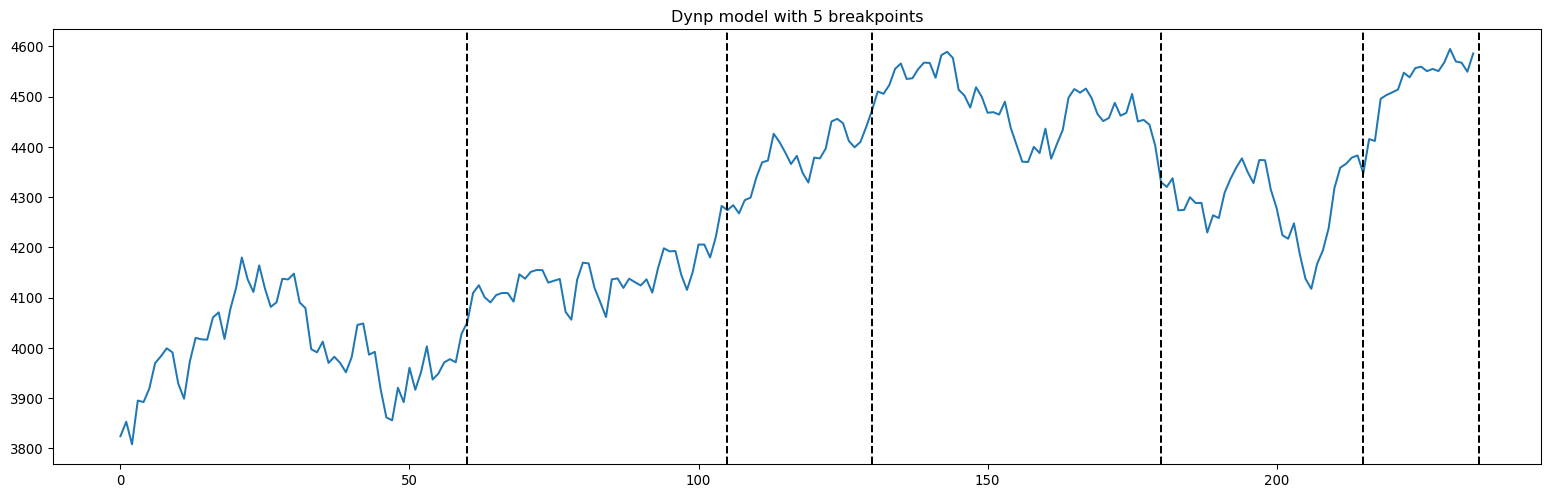

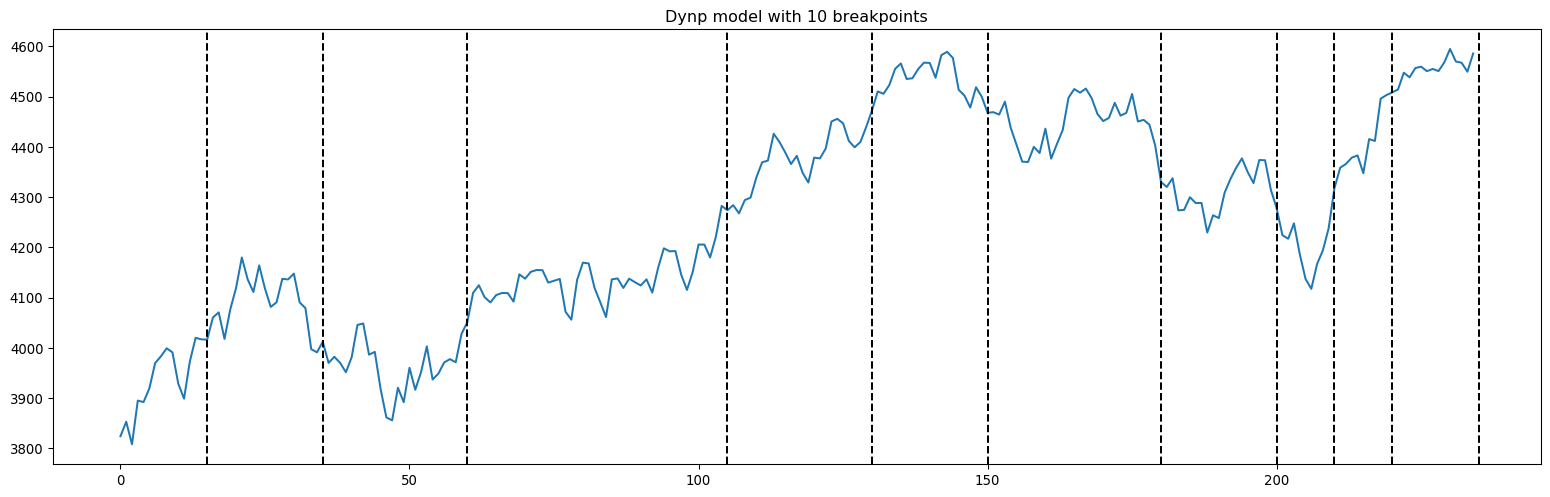

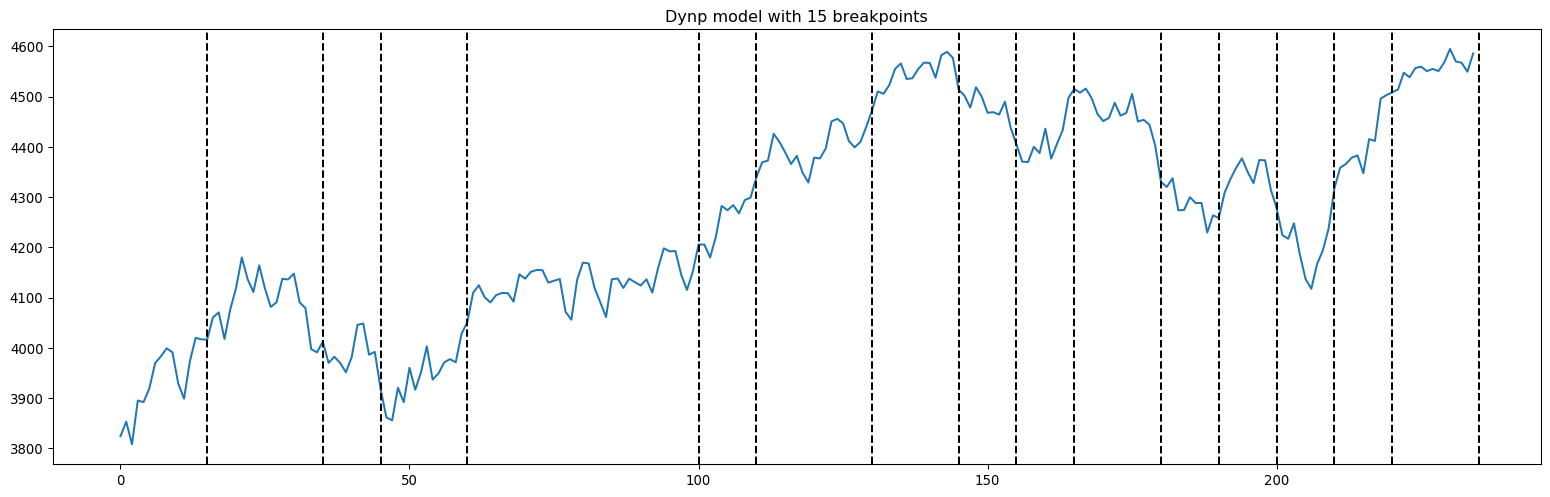

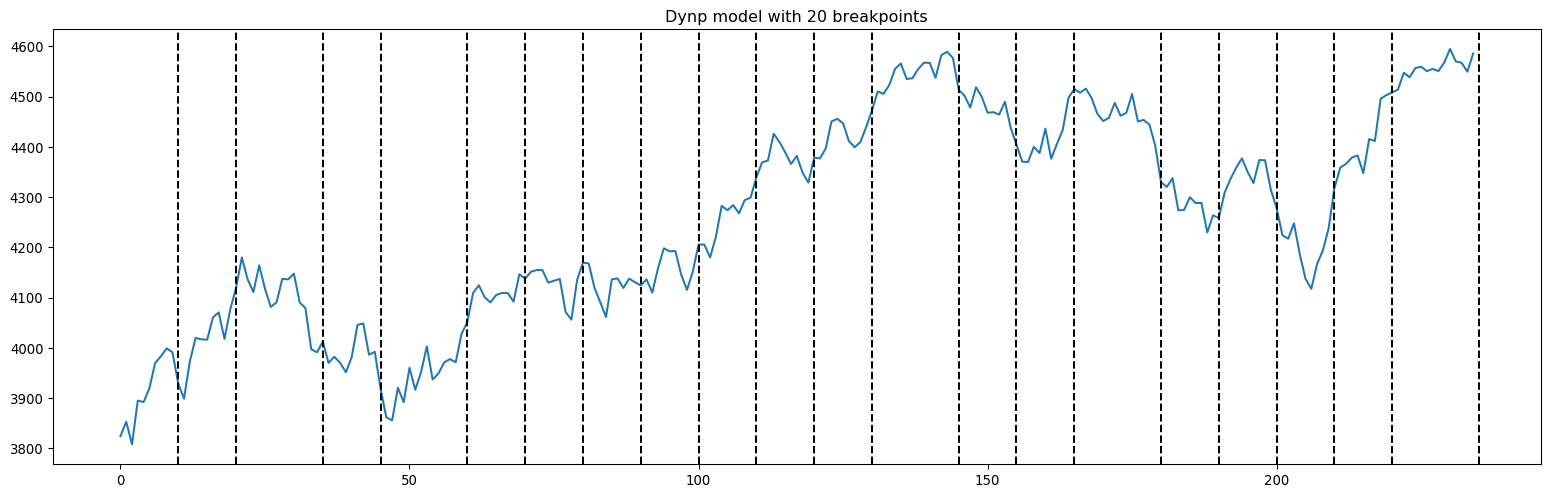

In [36]:
for nbkps in [5,10,15,20]:
    fig, ax = plt.subplots(1,1, figsize=(20,6), dpi=96)
    algo = rpt.Dynp(model="l2", min_size=10)
    algo.fit(data.values)
    result = algo.predict(n_bkps=nbkps)
    ax.plot(data['Price'].values)
    for bkp in result:
        ax.axvline(x=bkp, color='k', linestyle='--')
    ax.set_title(f"Dynp model with {nbkps} breakpoints")

# Method 3

## Binary Segmentation

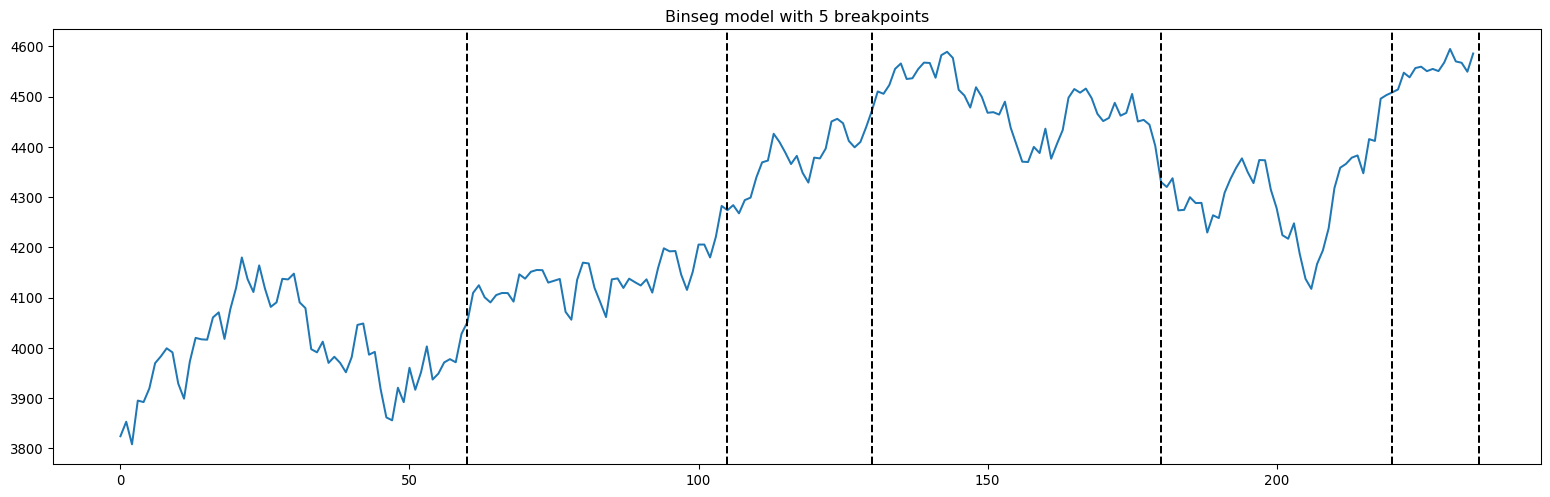

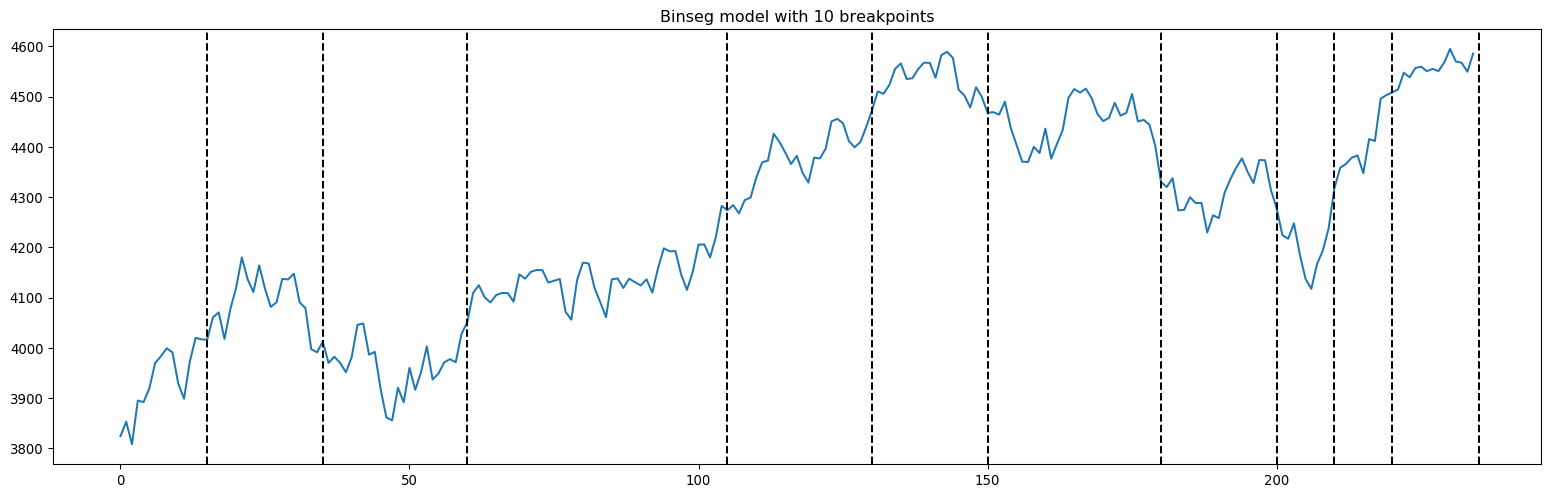

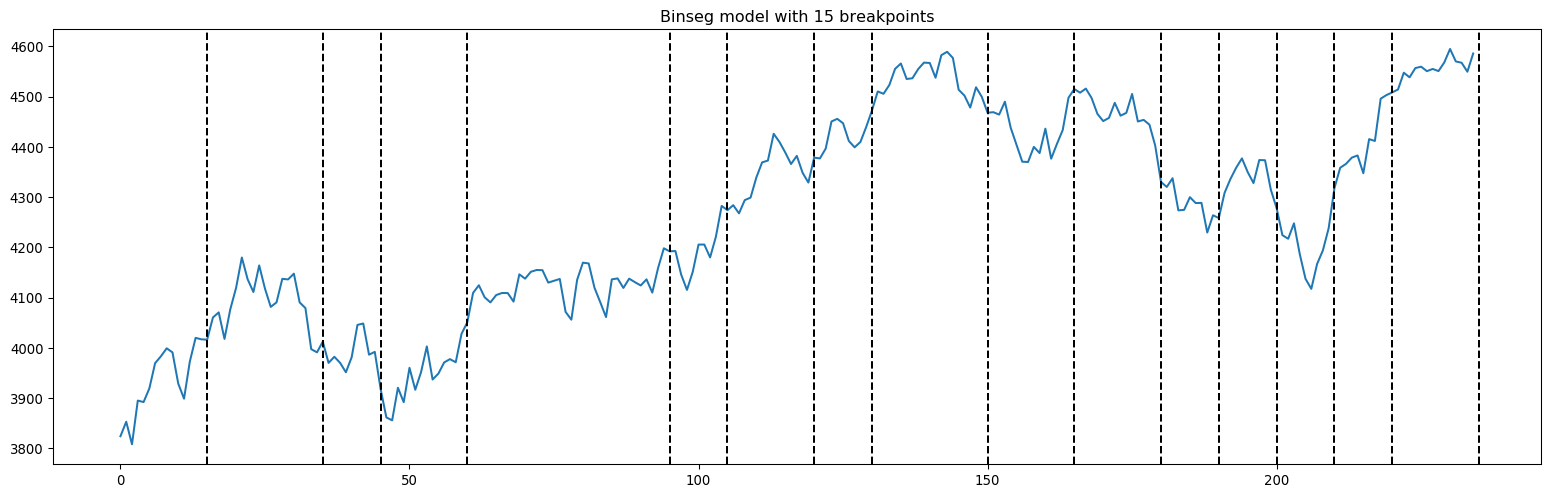

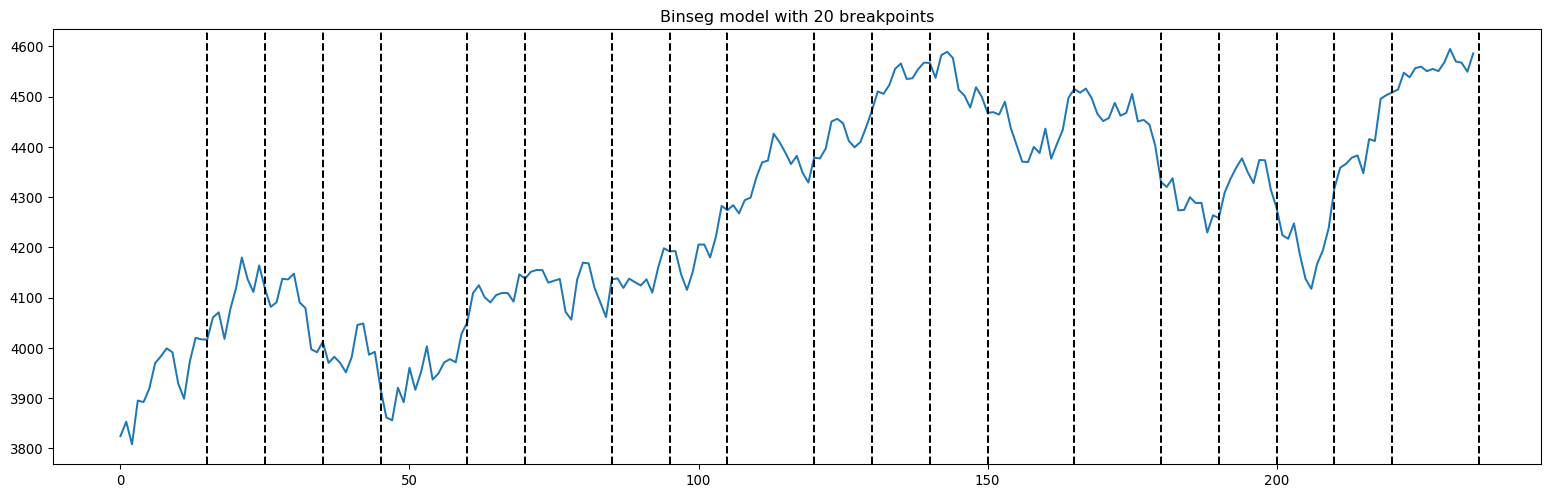

In [38]:
for nbkps in [5,10,15,20]:
    fig, ax = plt.subplots(1,1, figsize=(20,6), dpi=96)
    algo = rpt.Binseg(model="l2", min_size=10)
    algo.fit(data.values)
    result = algo.predict(n_bkps=nbkps)
    ax.plot(data['Price'].values)
    for bkp in result:
        ax.axvline(x=bkp, color='k', linestyle='--')
    ax.set_title(f"Binseg model with {nbkps} breakpoints")